In [38]:
# import all necessary packages
import pandas as pd
import numpy as np
import warnings
from pandas.core.common import SettingWithCopyWarning
#warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
import matplotlib.pyplot as plt
from scipy.stats import loguniform
import predictive as pred
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import seaborn as sns

In [2]:
# import datasets
df_chicago = pd.read_csv("data/datasets/df_chicago.csv.zip")

In [3]:
df_chicago_cluster = df_chicago[['start_time_hourly','Trip_Seconds',"Trip_Miles"]]
df_chicago_cluster

,start_time_hourly,Trip_Seconds,Trip_Miles
0,0,900.0,2.7
1,0,240.0,0.4
2,0,1920.0,0.6
3,0,180.0,1.0
4,0,240.0,0.3
...,...,...,...
8974515,23,540.0,1.4
8974516,23,1860.0,5.9
8974517,23,720.0,2.0
8974518,23,660.0,3.5


When researching for the best score to use when deciding which number of cluster to choose for the Gaussian Mixture Model (soft-clustering), we found the Silhouette score and the Bayesian information criterion (BIC).

### Silhouette score

In [15]:
def silhoutte(input_data, num_clus):

    #input data: part of df to cluster

    clusters = []
    scores = []

    for k in range(num_clus):
        
        model_clus = GaussianMixture(n_components = k+2, n_init = 15) #defaults: init_params='kmeans'
        labels = model_clus.fit_predict(input_data)
        
        clusters.append(k+1)
        scores.append(silhouette_score(input_data, labels = labels, sample_size=1000,random_state=42))
        #defaults: metric=euclidian
        
    return clusters, scores

In [16]:
df_score = df_chicago_cluster.sample(5000, random_state=42)

In [17]:
clusters, scores = silhoutte(df_score, 10)

In [18]:
# method to plot the most valuable number of clusters
def plot_best_fitting_number_of_clusters(input_data, title_info):
    
    fig = plt.figure(figsize=(16,8))

    plt.subplot(1, 2, 1)

   # clusters, scores = get_clusters_and_losses(input_data)

    plt.plot(clusters, scores)
    plt.ylabel("Loss")
    plt.xlabel("Number of clusters")
    plt.title(f"Number of Clusters {title_info}")

    plt.subplot(1, 2, 2)

    plt.plot(clusters, scores)
    plt.ylabel("Loss")
    plt.xlabel("Number of clusters")
    plt.xlim([0,12])
    plt.title(f"Number of Clusters {title_info} - Deeper Look")

    plt.show()

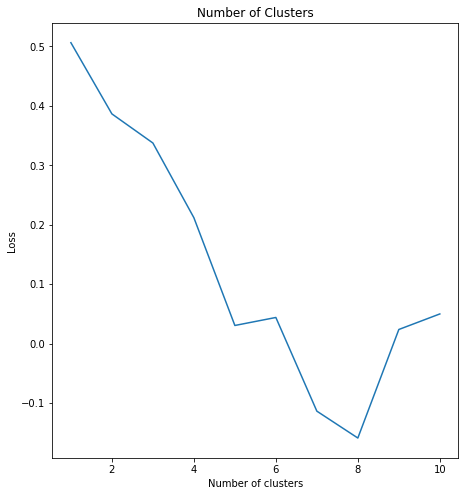

In [19]:
fig = plt.figure(figsize=(16,8))

plt.subplot(1, 2, 1)

   # clusters, scores = get_clusters_and_losses(input_data)

plt.plot(clusters, scores)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.title(f"Number of Clusters")

plt.show()

### Bayesian information criterion (BIC)

In [20]:
def bic(input_data, num_clus):

    #input data: part of df to cluster

    clusters = []
    scores = []

    for k in range(num_clus):
        
        model_clus = GaussianMixture(n_components = k+2, n_init = 15) #defaults: init_params='kmeans'
        model_clus.fit(input_data)
        
        clusters.append(k+1)
        scores.append(model_clus.bic(input_data))

        #defaults: metric=euclidian
        
    return clusters, scores

In [21]:
clusters, scores = bic(df_score, 10)

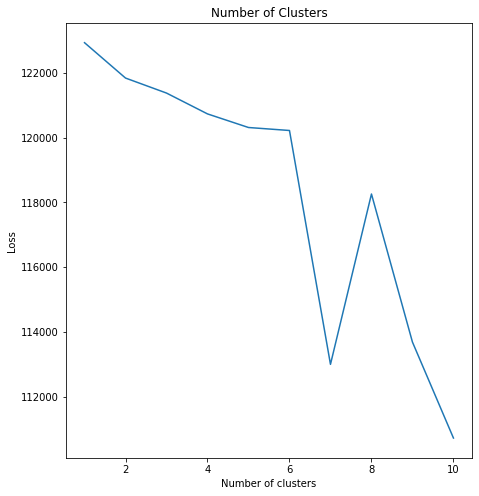

In [22]:
fig = plt.figure(figsize=(16,8))

plt.subplot(1, 2, 1)

   # clusters, scores = get_clusters_and_losses(input_data)

plt.plot(clusters, scores)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.title(f"Number of Clusters")

plt.show()

cluster 9

In [23]:
df_clusters = df_chicago_cluster

In [25]:
gm = GaussianMixture(n_components=9, random_state=42).fit(df_clusters)

In [28]:
cluster = gm.predict(df_clusters)

In [29]:
cluster_prob = gm.predict_proba(df_clusters)

In [30]:
df_clusters["cluster"] = cluster

/var/folders/rm/wg58__0d187f9f9gt07rpkw40000gn/T/ipykernel_15387/1936833087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clusters["cluster"] = cluster


In [33]:
for k in range(9):
    df_clusters[f"cluster_{k}_prob"] = cluster_prob[:, k]

/var/folders/rm/wg58__0d187f9f9gt07rpkw40000gn/T/ipykernel_15387/663467526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clusters[f"cluster_{k}_prob"] = cluster_prob[:, k]


In [34]:
df_clusters

,start_time_hourly,Trip_Seconds,Trip_Miles,cluster,cluster_0_prob,cluster_1_prob,cluster_2_prob,cluster_3_prob,cluster_4_prob,cluster_5_prob,cluster_6_prob,cluster_7_prob,cluster_8_prob
0,0,900.0,2.7,1,7.572812e-12,6.074898e-01,1.689450e-04,1.345806e-04,1.580733e-27,2.263834e-03,3.899429e-01,8.393649e-20,1.199954e-88
1,0,240.0,0.4,3,6.638978e-03,9.879935e-08,4.543070e-08,5.172538e-01,1.422083e-34,2.506886e-11,1.420439e-04,1.579933e-25,4.759650e-01
2,0,1920.0,0.6,5,1.912886e-159,3.138345e-04,2.290529e-01,2.815930e-36,1.632436e-21,7.706332e-01,2.044863e-14,3.588678e-36,0.000000e+00
3,0,180.0,1.0,8,9.164756e-05,5.751516e-08,3.899060e-08,2.760687e-01,2.069771e-35,1.647519e-11,8.671896e-05,2.618873e-27,7.237528e-01
4,0,240.0,0.3,3,8.176827e-03,1.221415e-07,6.513134e-08,7.279964e-01,2.245351e-34,3.125396e-11,1.751965e-04,2.853420e-25,2.636514e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8974515,23,540.0,1.4,7,1.308843e-02,3.407000e-05,1.635449e-05,1.161613e-01,9.221474e-02,5.121591e-07,2.298261e-03,7.761863e-01,5.698002e-22
8974516,23,1860.0,5.9,2,1.842789e-88,2.729195e-08,9.914505e-01,2.601071e-31,1.539856e-03,7.009635e-03,7.810147e-19,3.531224e-23,0.000000e+00
8974517,23,720.0,2.0,4,2.286032e-06,3.292779e-03,2.221013e-04,1.567701e-01,4.353309e-01,6.044770e-05,1.006154e-01,3.037059e-01,1.682982e-50
8974518,23,660.0,3.5,4,3.352449e-10,5.791612e-03,4.796172e-04,6.777126e-03,6.774958e-01,9.765379e-05,9.654877e-02,2.128094e-01,7.525286e-49


In [39]:
def plot_information_about_clusters(df, feature_list, cluster_column):
    
    fig = plt.figure(figsize=(14, 18))
    
    for i in range(1, len(feature_list)+1):
        plt.subplot(np.floor(len(feature_list)/2).astype(int)+1, 2, i)
        sns.boxplot(y=df[feature_list[i-1]], 
                    x = df[cluster_column], 
                    palette="bright",
                    showmeans=True,
                    meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"}).set_title("Cluster - " + feature_list[i-1]).set_fontsize('18')
        plt.tight_layout()
    
    plt.subplot(np.floor(len(feature_list)/2).astype(int)+1, 2, len(feature_list)+1)
    ax = sns.countplot(x=cluster_column, data=df, palette="bright")
    ax.set_xlabel("Cluster")
    ax.set_ylabel("Amount")
    ax.set_title('Cluster - Amount',fontsize=18)
    fig.tight_layout()

    for container in ax.containers:
        ax.bar_label(container)

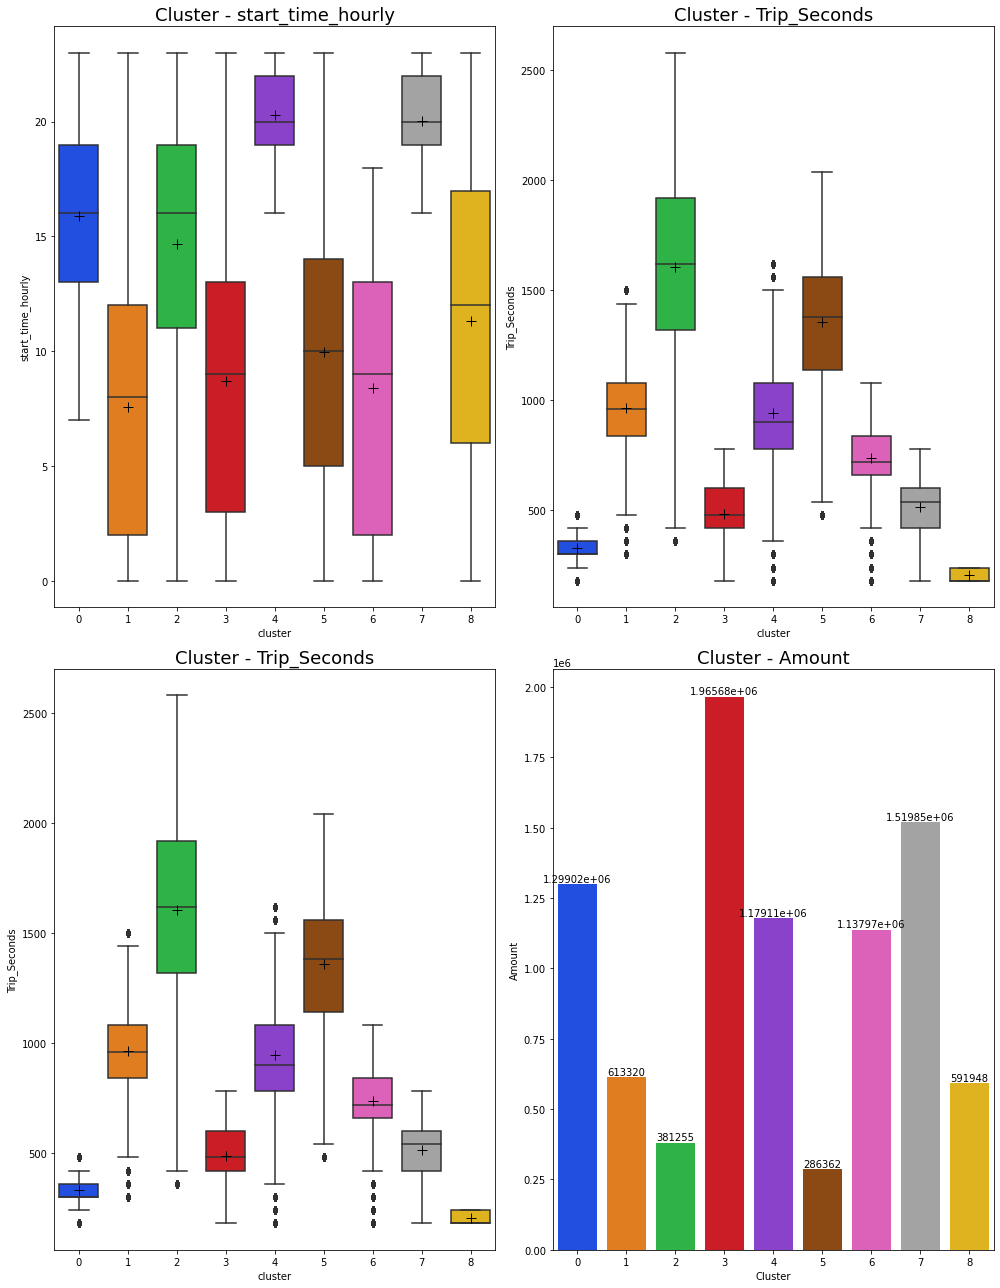

In [40]:
plot_information_about_clusters(df_clusters, ['start_time_hourly', 'Trip_Seconds', 'Trip_Seconds'], 'cluster')

In [44]:
colors = {'Morning commuters {short trips to work}' : '#16C835',
          'Morning commuters {medium-long trips to work}' : '#FF7C00',
          'Evening commuters {short trips from work}' : '#8B2BE2',
          'Evening commuters {medium-long trips to work}' : '#843C0C',
          'Ordinary cyclists - Long trip {long distance trips distributed throughout the day}': '#023EFF'}

g = sns.pairplot(data=df_clusters[['start_time_hourly', 'Trip_Seconds', 'Trip_Seconds','cluster']], 
             hue = 'cluster', palette=colors, height=4, aspect=1)

#styling the output
handles = g._legend_data.values()
labels = g._legend_data.keys()
g._legend.remove()
g.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=1)
g.fig.subplots_adjust(top=0.89, bottom=0.08)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().